In [14]:
# EJERCICIO 1

In [ ]:
# 1. Check if your country is a polygon or multipolygon.

In [15]:
import os


import geopandas as gpd
from  fiona import listlayers

#mapa
canadamaps='maps/canadaMaps.gpkg'

#layers in maps
listlayers(canadamaps)

['countries', 'cities', 'rivers']

In [16]:
canada=gpd.read_file(canadamaps,layer='countries')
canada_cities=gpd.read_file(canadamaps,layer='cities')
canada_rivers=gpd.read_file(canadamaps,layer='rivers')

In [17]:
canada

,COUNTRY,geometry
0,Canada,"MULTIPOLYGON (((385323.172 23951253.091, 38663..."


In [18]:
# 2. Recover just the boundaries of that country.

<Axes: >

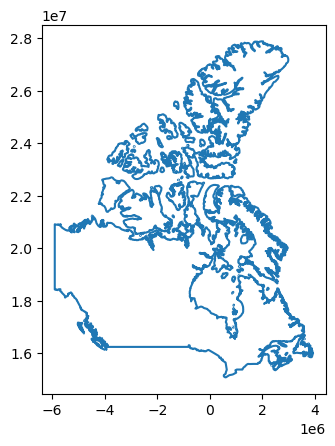

In [19]:
canada.boundary.plot()

In [20]:
# 3. Turn the boundary into a GDF

In [21]:
type(canada.boundary)

geopandas.geoseries.GeoSeries

In [22]:
canada.boundary.to_frame()

,0
0,"MULTILINESTRING ((385323.172 23951253.091, 386..."


In [36]:
# conversion
canada_border=canada.boundary.to_frame() 

# new column (optional)
canada_border['name']='Canada' 

# renaming the geometry column
canada_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
canada_border = canada_border.set_geometry("geometry")

# verifying:

new_crs = "EPSG:3978"
# Cambia el CRS del GeoDataFrame
canada = canada.to_crs(new_crs)
canada_cities = canada_cities.to_crs(new_crs)
canada_rivers = canada_rivers.to_crs(new_crs)

# Ahora, gdf tiene el nuevo CRS
canada_border.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [37]:
canada_border

,geometry,name
0,"MULTILINESTRING ((257670.964 3110556.613, 2578...",Canada


In [38]:
# EJERCICIO 2

In [39]:
# 1. Look for sub administrative divisions of your country
# 2. Check all the CRSs of those divisions
# 3. If you find one CRS is missing, fill the CRS with the right projection.

In [40]:
canada.crs.to_epsg()==canada_cities.crs.to_epsg()==canada_rivers.crs.to_epsg()

True

In [41]:
canada.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [42]:
canada_cities.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [43]:
canada_rivers.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [44]:
# EJERCICIO 3

# 1. Look for some points in a CSV file about your country.

# 2. Turn those points into a spatial object.

# 3. Save the layer.

In [55]:
import pandas as pd
import os

infoavion= pd.read_csv(os.path.join("data", "Airports_Aeroports.csv"), encoding='latin1')
infoavion

,TC_ID,IATA,ICAO_OACI,AIRPORT_T,AÉROPORT_T,TYPE_CODE,AIRPORT_AÉROPORT,CITY_VILLE,PROVINCE_EN,PROVINCE_FR,LATTITUDE,LONGITUDE
0,177,YXY,CYXY,Control Tower,Tour de contrôle,1,Erik Nielsen Whitehorse,Whitehorse,Yukon,Yukon,60.716666,-135.066666
1,185,YYJ,CYYJ,Control Tower,Tour de contrôle,1,Victoria International,Victoria,British Columbia,Colombie-Britannique,48.650000,-123.433333
2,188,YYT,CYYT,Control Tower,Tour de contrôle,1,St John's Intl,Saint John,Newfoundland and Labrador,Terre-Neuve-et-Labrador,47.616666,-52.750000
3,121,YQX,CYQX,Control Tower,Tour de contrôle,1,Gander International,Gander,Newfoundland and Labrador,Terre-Neuve-et-Labrador,48.933333,-54.566666
4,71,YHZ,CYHZ,Control Tower,Tour de contrôle,1,Halifax Robert L. Stanfield International,Halifax,Nova Scotia,Nouvelle-Écosse,44.883333,-63.516666
...,...,...,...,...,...,...,...,...,...,...,...,...
88,92,YND,CYND,Flight Service Station,Station d'information de vol,2,Ottawa/Gatineau,Gatineau,Quebec,Québec,45.516666,-75.566666
89,178,YYB,CYYB,Flight Service Station,Station d'information de vol,2,North Bay,North Bay,Ontario,Ontario,46.366666,-79.416666
90,57,YGR,CYGR,Flight Service Station,Station d'information de vol,2,Iles-de-la-Madeleine,Iles-de-la-Madeleine,Quebec,Québec,47.416666,-61.783333
91,90,YMX,CYMX,Control Tower / Flight Service Station,Tour de contrôle / Station d'information de vol,3,Montreal (Mirabel),Mirabel,Quebec,Québec,45.683333,-74.033333


In [56]:
# bye first row 
infoavion.drop(index=0,inplace=True)
infoavion.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['CITY_VILLE', 'LONGITUDE','PROVINCE_EN','PROVINCE_FR','LATTITUDE']
infoavion=infoavion.loc[:,keep]
infoavion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CITY_VILLE   92 non-null     object 
 1   LONGITUDE    92 non-null     float64
 2   PROVINCE_EN  92 non-null     object 
 3   PROVINCE_FR  92 non-null     object 
 4   LATTITUDE    92 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.7+ KB


<Axes: xlabel='LONGITUDE', ylabel='LATTITUDE'>

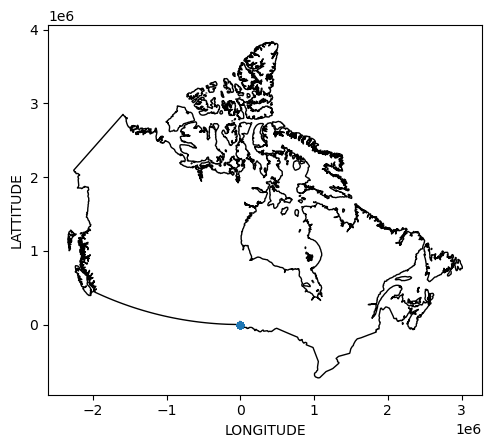

In [58]:
# let's plot

base = canada.plot(color='white', edgecolor='black') #unprojected

infoavion.plot.scatter(x = 'LONGITUDE', y = 'LATTITUDE',ax=base)

In [60]:
avion=gpd.GeoDataFrame(data=infoavion.copy(),
                 geometry=gpd.points_from_xy(infoavion.LONGITUDE,
                                             infoavion.LATTITUDE), 
                 crs=3978)# the coordinates were in degrees - unprojected

In [61]:
avion = avion.to_crs(3978)

<Axes: >

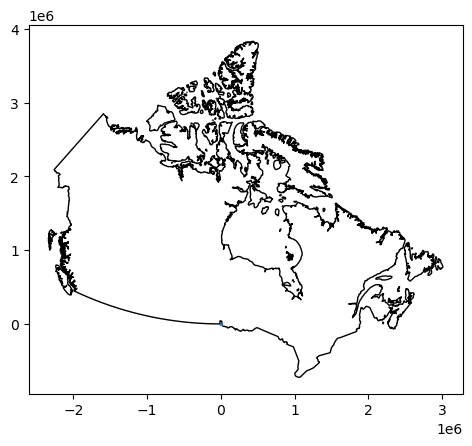

In [66]:
# let's plot

base = canada.plot(color='white', edgecolor='black')
avion.plot(ax=base,markersize=1)